# A/B Testing Hypothesis tests

## Scenario

You are a data scientist working for a web-based company and you are planning to roll out a new site design soon. For random samples of users one of two competing designs were presented and the ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases, and if the result is statistically significant.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
import matplotlib
matplotlib.__version__

'1.5.1'

## pip install --upgrade pandas

In [3]:
# Generate some data and randomize

# Some people bought nothing, the others bought with some distribution, see numbers mean
data1 = [0] * 50
data1.extend(np.random.normal(12, 4, size=150))
np.random.shuffle(data1)

# The second design hooked less people, but those that were hooked bought more stuff
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, size=100))
np.random.shuffle(data2)

# Make a DataFrame
df = pd.DataFrame({'A': data1, 'B':data2})
df.head()

,A,B
0,0.000000,0.000000
1,19.062727,0.000000
2,6.977156,13.307456
3,0.000000,0.000000
4,13.878759,16.857526


#### Question: What does the above code do?

Answer:

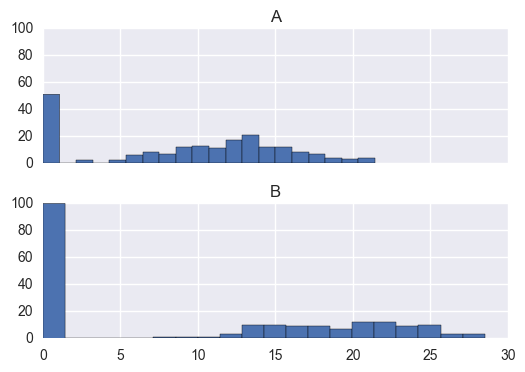

In [4]:
# Let's plot the data first
df.hist(bins=20, layout=(2,1), sharex=True, sharey=True);

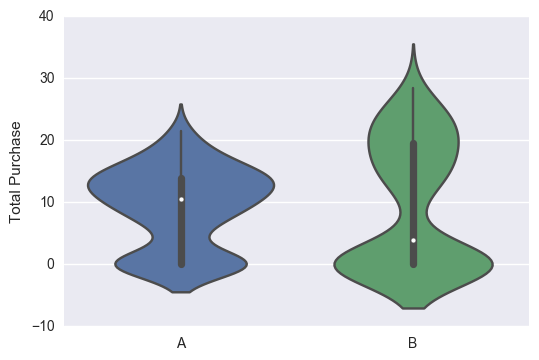

In [5]:
# Seaborn is also useful

sns.violinplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

## Exercises

* In the next cell, use pandas to make box plots from the data frame. Feel free to Google around if you can't remember how to do this.

In [1]:
# Make your boxplot here
ax = df.boxplot()
ax.set_ylim([-10, 40]);

NameError: name 'df' is not defined

#### Question: Do you like the boxplots or violin plots better, and why or why not?

Answer:

#### Question: Are our datasets normal, or approximately so? Take a look at, run, and interpret: [scipy.stats.normaltest](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html)

In [9]:
from scipy.stats import normaltest
normaltest(df['A'])

NormaltestResult(statistic=62.827179114736992, pvalue=2.2764147893665501e-14)

# Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

Each test makes various assumptions:
* ANOVA assumes normal distributions and equal variances in the two data sets
* The Welch t-test assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, and produces a weaker p-value

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (stronger p-values) but can be misleading on data sets that don't satisfy the assumptions.

#### Question: What is the null hypothesis for these tests?

Answer: There is no difference between the two sites, any difference is due to chance

#### What is the alternative hypothesis?

Answer:

In [ ]:
#One of the websites is better

#### Question: Which test is most appropriate for our data?

Answer:


In [ ]:
#Welch or Mann-Whitney

All of these tests are available in the `scipy` library, a stats library for python:
* [ANOVA](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.f_oneway.html)
* [Welch's t-test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Mann-Whitney](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.mannwhitneyu.html)

In [10]:
# For example, to use ANOVA
statistic, pvalue = stats.f_oneway(df["A"], df["B"])
print(pvalue)

0.686706537294


In [14]:
# Use the Mann-Whitney test on our data
# look up the function in scipy from the link above
from scipy.stats import mannwhitneyu
mannwhitneyu(df['A'], df['B'])

MannwhitneyuResult(statistic=19493.0, pvalue=0.32631075134076892)

In [18]:
#try Mann-Whitney
#try normal dist
from scipy.stats import normaltest
normaltest(df)

NormaltestResult(statistic=array([ 62.82717911,   2.62753906]), pvalue=array([  2.27641479e-14,   2.68804876e-01]))

# Interpret your results
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend and why? Write two sentences explaining your results and your recommendation.

Your explanation here.

# Final Exercise

Your results may or may not have been significant depending on the randomness of the data set. Try running the notebook a few more times to see if anything changes. You can do this in one step by using the Kernal menu and selecting "Restart & Run All".

If you can't get the opposite outcome, try altering the distributions of the data sets (change the variance in the second argument) until you get the other outcome.